<a href="https://colab.research.google.com/github/kchen79427/Capstone_Bruestle_Boudia_Chen/blob/dave_branch/Models/Test_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

In [ ]:
# These next few lines enable access to the py files needed to support the NN model
import sys
sys.path.append('/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/')
sys.path.append('/content/drive/Shareddrives/STUDENT-Capstone SS23/')

In [ ]:
# get our files json so we can use json instead of actual file paths
import json
files = json.load(open('/content/drive/Shareddrives/STUDENT-Capstone SS23/files.json','r'))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report
import datetime
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

import json
# Keras and TensorFlow packages
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model, load_model
import keras.metrics
import keras.losses
from keras import backend as K
# from scikeras.wrappers import KerasClassifier
from NN_model import custom_f1, XTransform, create_model



pd.options.display.min_rows = 200



##Load & Compare Models

In [ ]:
preprocessor = joblib.load(files['Models']['pipe'])

In [ ]:
lr = joblib.load(files['Models']['LR'])

In [ ]:
rf = joblib.load(files['Models']['RF'])

In [ ]:
gb = joblib.load(files['Models']['GB'])

In [ ]:
# Load the pipeline first:
nn = joblib.load(files['Models']['NN_pipe'])

# Then, load the Keras model:
model = load_model(files['Models']['NN_mod'],
                  custom_objects={'create_model': create_model, 'custom_f1': custom_f1})

In [ ]:
# Add the keras model back into the pipeline's KerasClassifier (for convenience)
nn.named_steps['model'].model = model

In [ ]:
# Process set according to how most of the models were trained
use_cols=['Year', 'DestAirportSeqID', 'DestStateFips', 'CRSElapsedTime', 'Distance',
          'Reporting_Airline_AA', 'Reporting_Airline_AS', 'Reporting_Airline_B6', 'Reporting_Airline_CO', 'Reporting_Airline_DL',
          'Reporting_Airline_F9', 'Reporting_Airline_FL', 'Reporting_Airline_MQ', 'Reporting_Airline_NK', 'Reporting_Airline_UA',
          'Reporting_Airline_US', 'Reporting_Airline_VX', 'mfr_AIRBUS', 'mfr_BOEING', 'engine_type_Reciprocating',
          'engine_type_Turbofan', 'engine_type_Turbojet', 'w_type_9', 'w_type_C', 'w_type_N', 'w_type_V',
          'sky_c_det_9', 'sky_c_det_C', 'sky_c_det_M', 'sky_c_det_W', 'sky_cov_00', 'sky_cov_02', 'sky_cov_04',
          'sky_cov_07', 'sky_cov_08', 'sky_cov_09', 'sky_cov_10', 'sky_obs_tot_cov_00',
          'sky_obs_tot_cov_01', 'sky_obs_tot_cov_02', 'sky_obs_tot_cov_04', 'sky_obs_tot_cov_06', 'sky_obs_tot_cov_07',
          'sky_obs_tot_cov_08', 'sky_obs_tot_cov_09', 'w_type_d_9', 'w_type_d_C', 'w_type_d_N', 'w_type_d_V',
          'sky_c_det_d_9', 'sky_c_det_d_C', 'sky_c_det_d_M','sky_c_det_d_W', 'sky_cov_d_00', 'sky_cov_d_02', 'sky_cov_d_04', 'sky_cov_d_07', 'sky_cov_d_08', 'sky_cov_d_09',
          'sky_cov_d_10', 'sky_obs_tot_cov_d_00', 'sky_obs_tot_cov_d_01', 'sky_obs_tot_cov_d_02',
          'sky_obs_tot_cov_d_03', 'sky_obs_tot_cov_d_04', 'sky_obs_tot_cov_d_06', 'sky_obs_tot_cov_d_07', 'sky_obs_tot_cov_d_08',
          'sky_obs_tot_cov_d_09', 'CRSDepHour', 'passengers', 'no_engines', 'w_dir_angle',
          'w_speed_rate', 'sky_c_hgt', 'vis_dist', 'tmp_air', 'tmp_dew', 'sea_lvl_p', 'liq_precip_qty', 'liq_precip_dim',
          'liq_precip_cond', 'sky_cov_base_hgt', 'sky_cov_cld', 'sky_sum_cov', 'sky_sum_hgt', 'sky_low_cld_base_hgt',
          'at_pres_altimeter_rate', 'at_pres_stn_rate', 'w_dir_angle_d', 'w_speed_rate_d', 'sky_c_hgt_d', 'vis_dist_d',
          'tmp_air_d', 'tmp_dew_d', 'sea_lvl_p_d', 'liq_precip_qty_d', 'liq_precip_dim_d', 'liq_precip_cond_d',
          'sky_cov_base_hgt_d', 'sky_cov_cld_d', 'sky_sum_cov_d', 'sky_sum_hgt_d', 'sky_low_cld_base_hgt_d',
          'at_pres_altimeter_rate_d', 'at_pres_stn_rate_d']

features_to_scale=['CRSElapsedTime', 'Distance', 'passengers']

In [ ]:
test_set = pd.read_parquet(files['Final_Sets']['Test_set'])
nn_test_set = test_set.copy()
test_set.rename(columns={'DayofMonth':'Day'},inplace=True)
test_set['Date']=pd.to_datetime(test_set[['Year', 'Month', 'Day']])
test_set.drop(['Month', 'Day','Quarter','DayOfWeek'], axis=1,inplace=True)

test=test_set[use_cols].copy()
test.drop(columns='Year',inplace=True)
y_test=test_set[['Weather_Label']]
test[features_to_scale] = preprocessor.transform(test)


In [ ]:
# Use helper functions to assist with generating probabilities and graphs
def predict_binary(y_proba, threshold=0.5):
  binary_predictions = np.where(y_proba > threshold, 1, 0)
  return binary_predictions



def generate_matrix(y_true,predictions, y_pred_probability,m_name):
    print(f'F1 Score for {m_name}:', f1_score(y_true, predictions))
    cm = confusion_matrix(y_true,predictions,labels=[0,1])
    return cm

In [ ]:
models = {'Logistic regression':{'model':lr},'Random Forest':{'model': rf},
          'Neural Network':{'model':nn},
          'Gradient Boosting':{'model':gb}
}

1779/1779 [==============================] - 3s 1ms/step


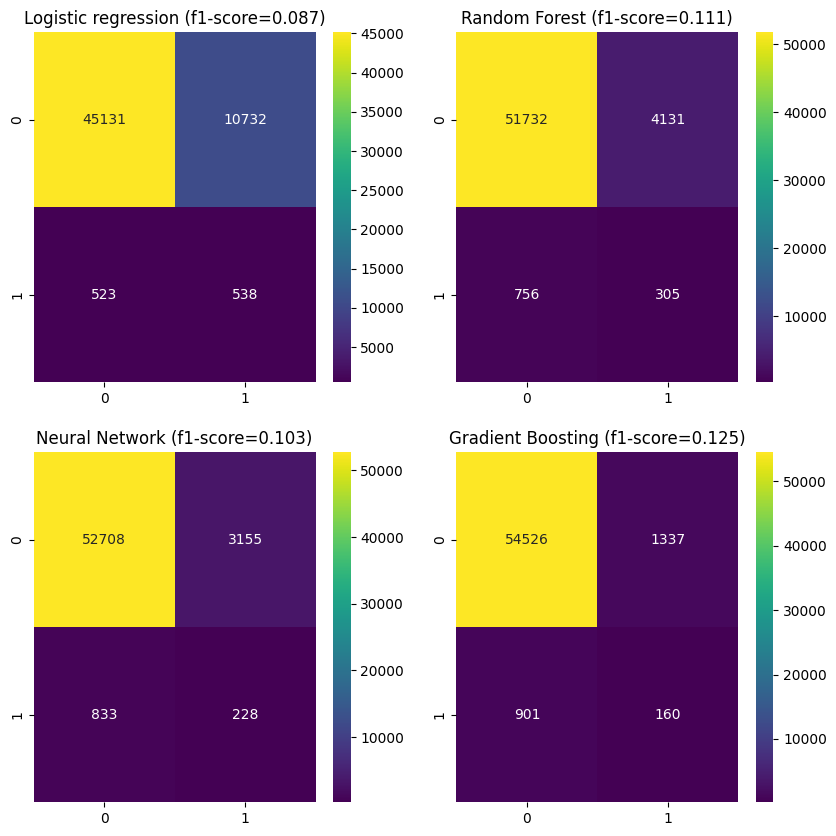

In [ ]:

fix, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()
i = 0
for k,v in models.items():
  if k == 'Neural Network':
    X_test = nn.named_steps['scale'].transform(nn_test_set)
    # X_test = nn.named_steps['tensor'].transform(X_test)
    y_preds_proba = v['model'].named_steps['model'].model.predict(X_test)
    y_preds = predict_binary(y_preds_proba)
    # fpr, tpr, thres = roc_curve(y_test,y_preds_proba)

  else:
    y_preds = v['model'].predict(test)
    y_preds_proba = v['model'].predict_proba(test)[:,1]

  fpr, tpr, thres = roc_curve(y_test,y_preds_proba)
  auc = roc_auc_score(y_test,y_preds_proba)
  models[k]['fpr'] = fpr
  models[k]['tpr'] = tpr
  models[k]['thres'] = thres
  models[k]['metrics'] = {}
  models[k]['metrics']['accuracy'] = accuracy_score(y_test,y_preds)
  models[k]['metrics']['precision'] = precision_score(y_test,y_preds)
  models[k]['metrics']['recall'] = precision_score(y_test,y_preds)
  models[k]['metrics']['f1'] = round(f1_score(y_test, y_preds),3)
  models[k]['metrics']['auc'] = round(auc,3)

  cm = confusion_matrix(y_test,y_preds,labels=[0,1])
  sns.heatmap(cm, annot=True, ax=axes[i],fmt='g', cmap='viridis')
  axes[i].set_title(f"{k} (f1-score={models[k]['metrics']['f1']})")
  i+=1



##ROC Curve Comparison

In [ ]:
import matplotlib.pyplot as plt

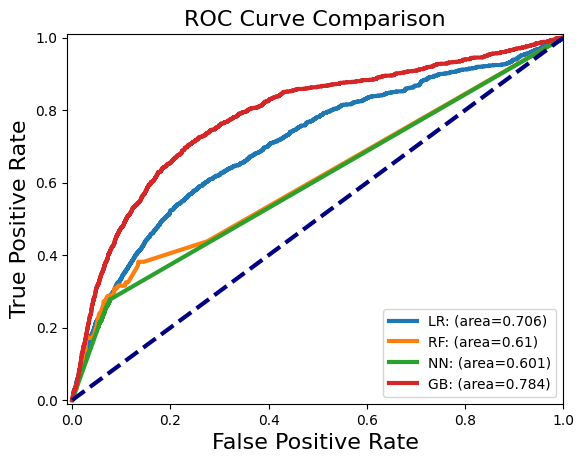

In [ ]:
# some code obtained from Professor Keyvn Collins-Thompson's Supervised Learning
# (SIADS 542 Course) Module 3 Notebook.  This creates each model's Receiver Operator
# Curve


plt.figure()
plt.plot(models['Logistic regression']['fpr'],
         models['Logistic regression']['tpr'],
         lw=3, label=f"LR: (area={models['Logistic regression']['metrics']['auc']})")

plt.plot(models['Random Forest']['fpr'],
         models['Random Forest']['tpr'],
         lw=3,
         label=f"RF: (area={models['Random Forest']['metrics']['auc']})")

plt.plot(models['Neural Network']['fpr'],
         models['Neural Network']['tpr'],
         lw=3, label=f"NN: (area={models['Neural Network']['metrics']['auc']})")

plt.plot(models['Gradient Boosting']['fpr'],
         models['Gradient Boosting']['tpr'],
         lw=3, label=f"GB: (area={models['Gradient Boosting']['metrics']['auc']})")

plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.title("ROC Curve Comparison",fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right');
plt.savefig('/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/roc_curve.png', dpi=800)

In [ ]:
# See all of the metrics in a tabular format

met_df = pd.DataFrame([models[x]['metrics'] for x in models.keys()])
model_names = ['lr','rf','nn','gb']
met_df.insert(0,'models',model_names)
met_df

,models,accuracy,precision,recall,f1,auc
0,lr,0.802280,0.047737,0.047737,0.087,0.706
1,rf,0.914149,0.068756,0.068756,0.111,0.610
2,nn,0.929942,0.067396,0.067396,0.103,0.601
3,gb,0.960684,0.106880,0.106880,0.125,0.784


In [ ]:
# Generate the predictions
lr_test_preds = lr_model.predict(test)

# Score the predictions
confusion = confusion_matrix(y_test, lr_test_preds)
print("Logistic Regression confusion matrix:\n", confusion)
print("TP   FP")
print("FN   TN")
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_test_preds)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_test_preds)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_test_preds)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_test_preds)))


Logistic Regression confusion matrix:
 [[45131 10732]
 [  523   538]]
TP   FP
FN   TN
Accuracy: 0.80
Precision: 0.05
Recall: 0.51
F1: 0.09


In [ ]:
rf_test_preds = rf_model.predict(test)# Score the predictions
confusion = confusion_matrix(y_test, rf_test_preds)
print("Random Forest confusion matrix:\n", confusion)
print("TP   FP")
print("FN   TN")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_test_preds)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_test_preds)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_test_preds)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_test_preds)))

Random Forest confusion matrix:
 [[51732  4131]
 [  756   305]]
TP   FP
FN   TN
Accuracy: 0.91
Precision: 0.07
Recall: 0.29
F1: 0.11


# Feature Importance

In [ ]:
# gb_feature_importance = gb.feature_importances_.round(3)
# feature_names = list(test.columns)



def get_feature_importance(model,model_name, feat_names):
  print(model_name)
  if model_name in ['Random Forest','Gradient Boosting']:
    model_feature_importance = model.feature_importances_.round(3)
  elif model_name == 'Logistic regression':
    model_feature_importance = model.coef_.reshape(-1).round(3)
  feature_importance_dict = dict(zip(feat_names, model_feature_importance))
  # Sort the dictionary by importance in descending order
  sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
  vars = pd.DataFrame(sorted_features,columns=['variable',f'{model_name}_score']).set_index('variable')
  vars['model'] = model_name
  return vars


feat_names = list(test.columns)
lst_df=[]
for k,v in models.items():
  if k != 'Neural Network':
    lst_df.append(get_feature_importance(v['model'],k, feat_names))
vars = pd.concat(lst_df,axis=1)


# for feature_name, importance in sorted_features:
#     print(f"Feature {feature_name}: {importance}")

Logistic regression
Random Forest
Gradient Boosting


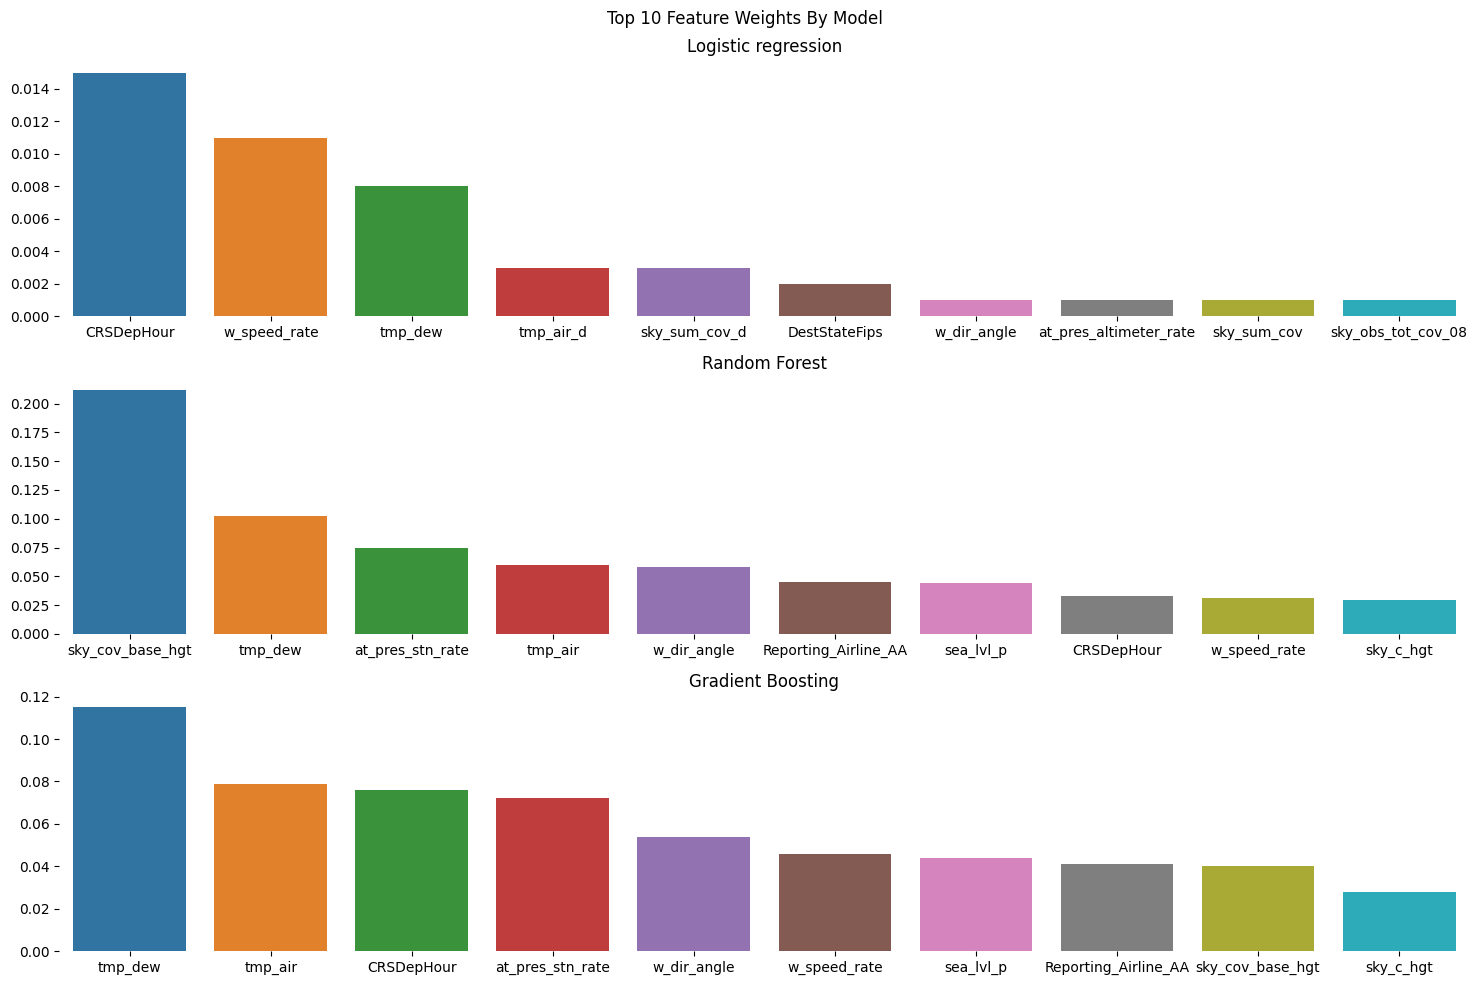

In [ ]:
import re
fig, axes = plt.subplots(3,1,figsize=(15,10))
plt.subplots_adjust(hspace=0.1)

plt.suptitle("Top 10 Feature Weights By Model")
for idx,col in enumerate([ c for c in vars.columns if '_score' in c]):
  top = vars[col].sort_values(ascending=False)[:10]
  sns.barplot(x=top.index,
              y=top.values,
              ax=axes[idx])
  title = re.sub('_score','',col)
  axes[idx].set_title(title)
  axes[idx].set_ylabel('')
  axes[idx].set_xlabel('')
  for spine in axes[idx].spines:
    axes[idx].spines[spine].set_visible(False)
plt.tight_layout()



In [ ]:
# fig = plt.figure(figsize=(30,40))
# sns.barplot(data=vars,
#             y=vars.index,
#             x='score',
#             hue='model'
#             )

In [ ]:
# Reconfigure Dataframe to use Radar Graph
top_rf = vars['Random Forest_score'].sort_values(ascending=False)[:5]
top_gb = vars['Gradient Boosting_score'].sort_values(ascending=False)[:5]
feats = set(top_rf.index).union(set(top_gb.index))
weath = pd.DataFrame(data=top_rf.values.reshape(1,-1), columns=top_rf.index)
comb_scores = pd.concat([weath, pd.DataFrame(top_gb).T],axis=0)
comb_scores.fillna(0,inplace=True)
comb_scores['model'] = ['RF_score','GF_score']
comb_scores.reset_index(drop=True)
tst = pd.melt(comb_scores, id_vars='model', value_vars=comb_scores.columns)

In [ ]:
# Plot the Radar Graph
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(tst, r='value', theta='variable', line_close=True, color='model')

fig.show();

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
json.dump(tst,open('/content/drive/Shareddrives/STUDENT-Capstone SS23/files.json','w') )

<Axes: >

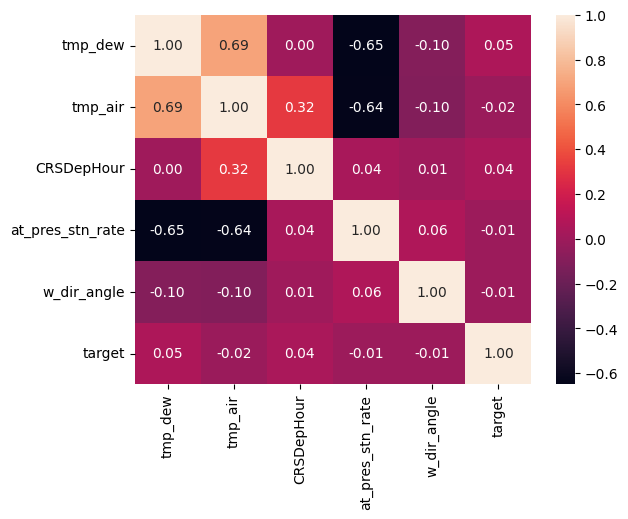

In [ ]:
# Check correlations of top features with target
check = test.copy()
check['target'] = y_test
sns.heatmap(check[list(top_gb.index.values) + ['target']].corr(),annot=True,fmt='.2f')